In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science','ieee', 'no-latex'])

df_cluster1 = pd.read_csv("../files/experiment_1/metrics_embl_preprocess_cluster_exp1_2cpu_3ram_30nodes.csv")
df_cluster2 = pd.read_csv("../files/experiment_1/metrics_embl_preprocess_cluster_exp1_3cpu_5ram_20nodes.csv")
df_cluster3 = pd.read_csv("../files/experiment_1/metrics_embl_preprocess_cluster_exp1_6cpu_10ram_10nodes.csv")

df_cluster1['Cluster'] = '2CPU 3RAM'
df_cluster2['Cluster'] = '3CPU 5RAM'
df_cluster3['Cluster'] = '6CPU 10RAM'

df_combined = pd.concat([df_cluster1, df_cluster2, df_cluster3], ignore_index=True)

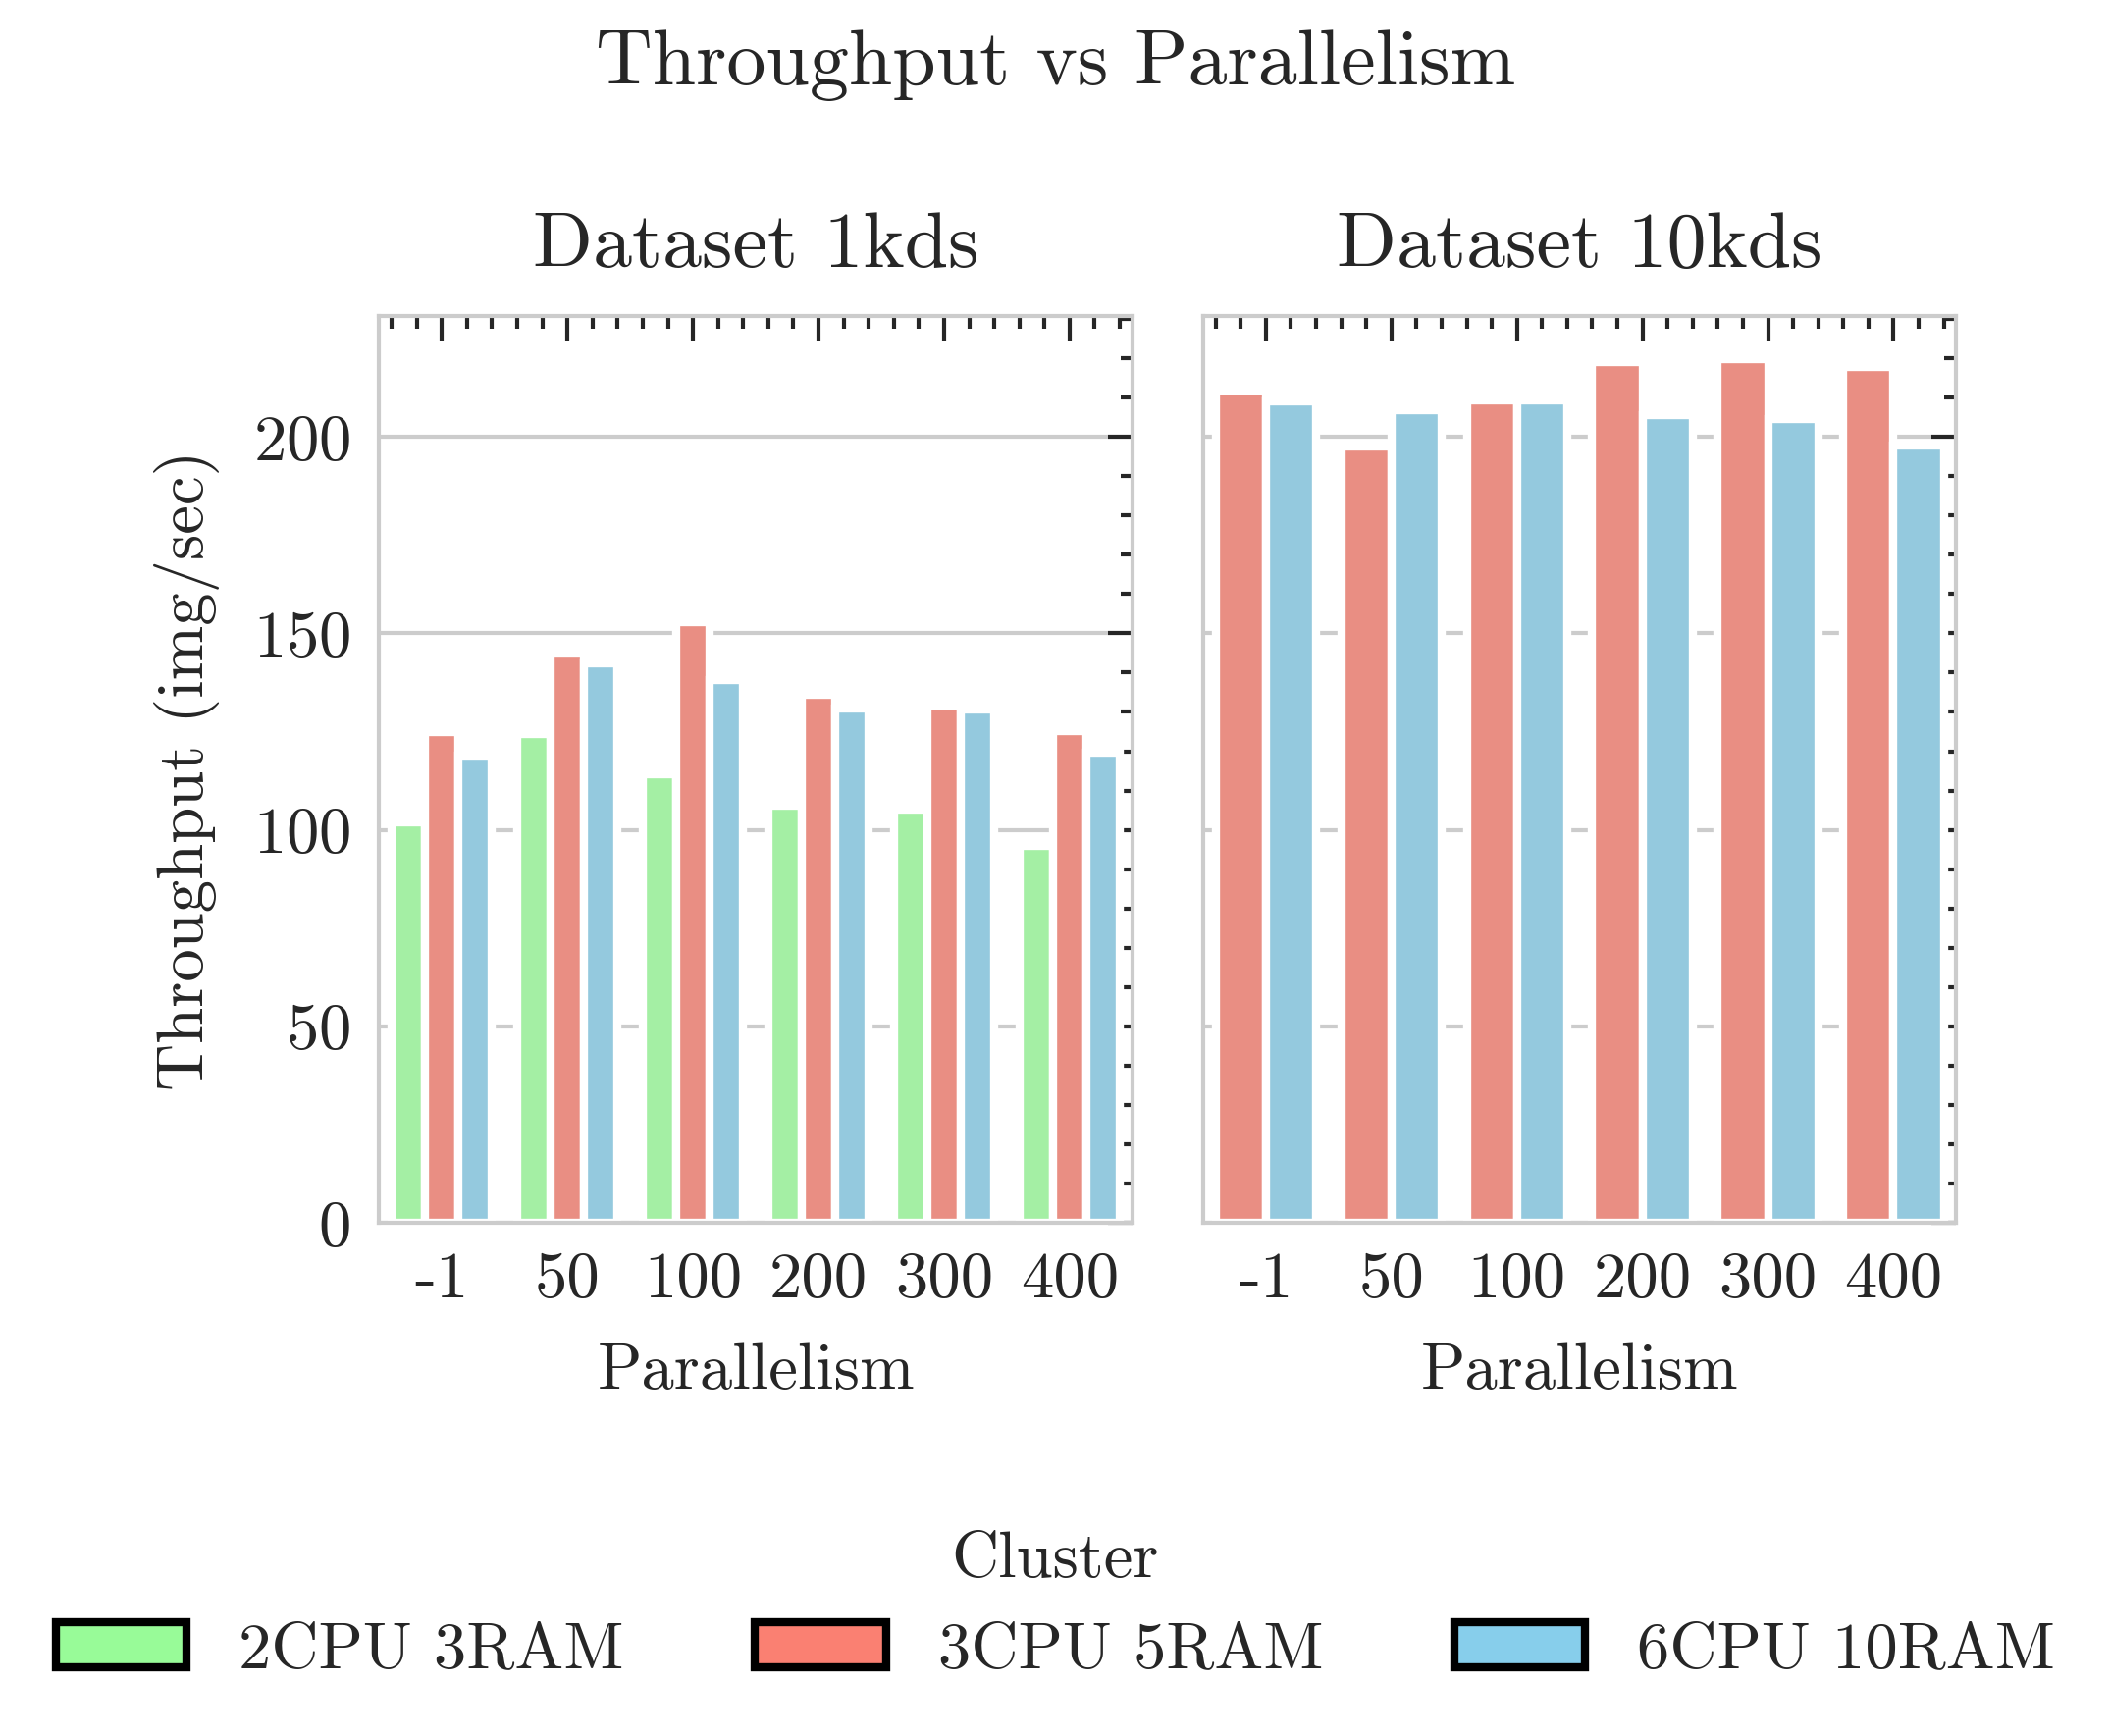

In [12]:
df_1kds = df_combined[df_combined['Dataset'] == '1kds']
df_10kds = df_combined[df_combined['Dataset'] == '10kds']

fig, axes = plt.subplots(1, 2, sharey=True)

colors = {'2CPU 3RAM': 'palegreen', '3CPU 5RAM': 'salmon', '6CPU 10RAM': 'skyblue'}

sns.barplot(ax=axes[0], x='Parallelism', y='Throughput (img/sec)', hue='Cluster', palette=colors, data=df_1kds, errorbar=None)
axes[0].set_title('Dataset 1kds')
axes[0].set_xlabel('Parallelism')
axes[0].set_ylabel('Throughput (img/sec)')
axes[0].legend_.remove()

sns.barplot(ax=axes[1], x='Parallelism', y='Throughput (img/sec)', hue='Cluster', palette=colors, data=df_10kds, errorbar=None)
axes[1].set_title('Dataset 10kds')
axes[1].set_xlabel('Parallelism')
axes[1].set_ylabel('Throughput (img/sec)')
axes[1].legend_.remove()

handles = [plt.Rectangle((0,0),1,1, color=color, ec="k") for color in colors.values()]
labels = colors.keys()
fig.legend(handles, labels, title='Cluster', bbox_to_anchor=(0.5, 0), loc='upper center', ncol=3)
fig.suptitle('Throughput vs Parallelism')
plt.tight_layout()
plt.show()